In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
walmart = pd.read_csv('Walmart.csv', na_values='NA', parse_dates=True, date_format='DD-MM-YYYY')
walmart.index = pd.DatetimeIndex(walmart['Date'])
walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,
2010-05-02,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
2010-12-03,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
2010-03-19,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
2010-03-26,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
2010-02-04,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808


In [24]:
walmart.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [25]:
walmart_data_store1 = walmart[walmart['Store'] == 1][['Date', 'Weekly_Sales']]
walmart_data_store1

,Date,Weekly_Sales
Date,,
2010-05-02,05-02-2010,1643690.90
2010-12-02,12-02-2010,1641957.44
2010-02-19,19-02-2010,1611968.17
2010-02-26,26-02-2010,1409727.59
2010-05-03,05-03-2010,1554806.68
...,...,...
2012-09-28,28-09-2012,1437059.26
2012-05-10,05-10-2012,1670785.97
2012-12-10,12-10-2012,1573072.81


In [26]:
walmart_data_store1

,Date,Weekly_Sales
Date,,
2010-05-02,05-02-2010,1643690.90
2010-12-02,12-02-2010,1641957.44
2010-02-19,19-02-2010,1611968.17
2010-02-26,26-02-2010,1409727.59
2010-05-03,05-03-2010,1554806.68
...,...,...
2012-09-28,28-09-2012,1437059.26
2012-05-10,05-10-2012,1670785.97
2012-12-10,12-10-2012,1573072.81


In [27]:
walmart_data_store1.set_index(walmart_data_store1['Date'], inplace=True)
# walmart_data_store1.index = pd.DatetimeIndex(walmart_data_store1.index, freq='W')

In [28]:
# seasonal_decompose(walmart_data_store1['Weekly_Sales']).plot()
print(walmart_data_store1.index)

Index(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010', '05-03-2010',
       '12-03-2010', '19-03-2010', '26-03-2010', '02-04-2010', '09-04-2010',
       ...
       '24-08-2012', '31-08-2012', '07-09-2012', '14-09-2012', '21-09-2012',
       '28-09-2012', '05-10-2012', '12-10-2012', '19-10-2012', '26-10-2012'],
      dtype='object', name='Date', length=143)


<Axes: xlabel='Date'>

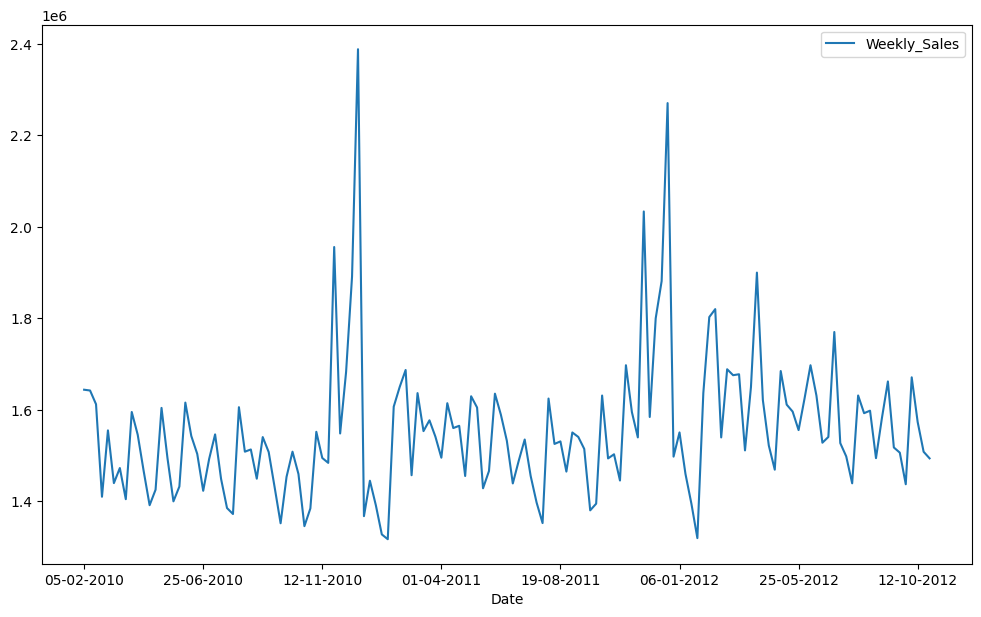

In [29]:
walmart_data_store1.plot(figsize=(12, 7))

In [30]:
from statsmodels.tsa.stattools import adfuller
adfuller(walmart_data_store1['Weekly_Sales'], autolag='AIC')

(-5.102186145192285,
 1.3877788330759535e-05,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 3412.7325502876756)

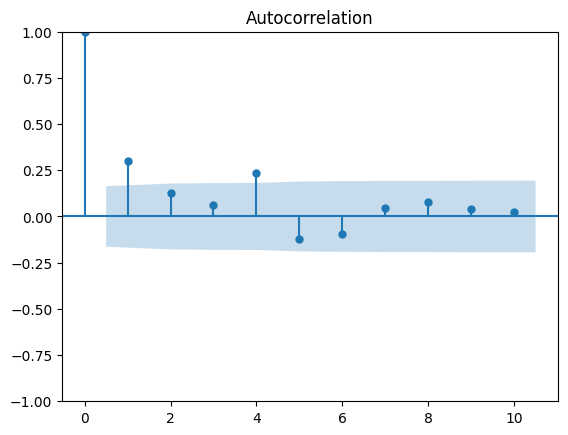

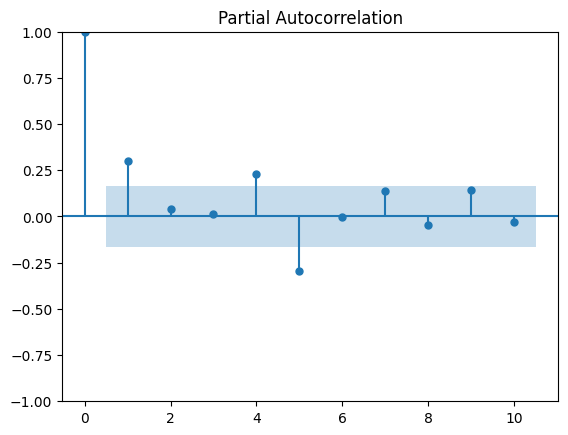

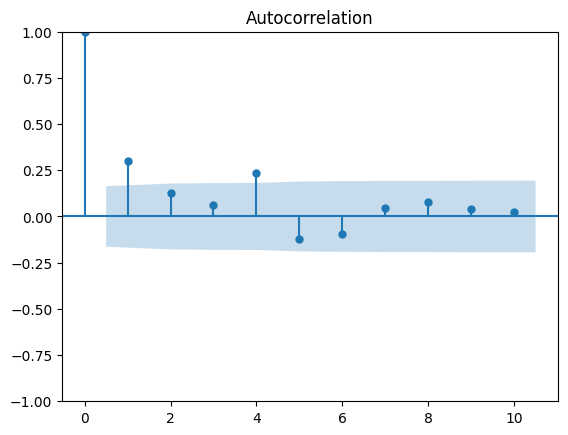

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(walmart_data_store1['Weekly_Sales'], lags=10)
plot_acf(walmart_data_store1['Weekly_Sales'], lags=10)

In [34]:
walmart_data_store1.index[0:30]

Index(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010', '05-03-2010',
       '12-03-2010', '19-03-2010', '26-03-2010', '02-04-2010', '09-04-2010',
       '16-04-2010', '23-04-2010', '30-04-2010', '07-05-2010', '14-05-2010',
       '21-05-2010', '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010', '23-07-2010',
       '30-07-2010', '06-08-2010', '13-08-2010', '20-08-2010', '27-08-2010'],
      dtype='object', name='Date')

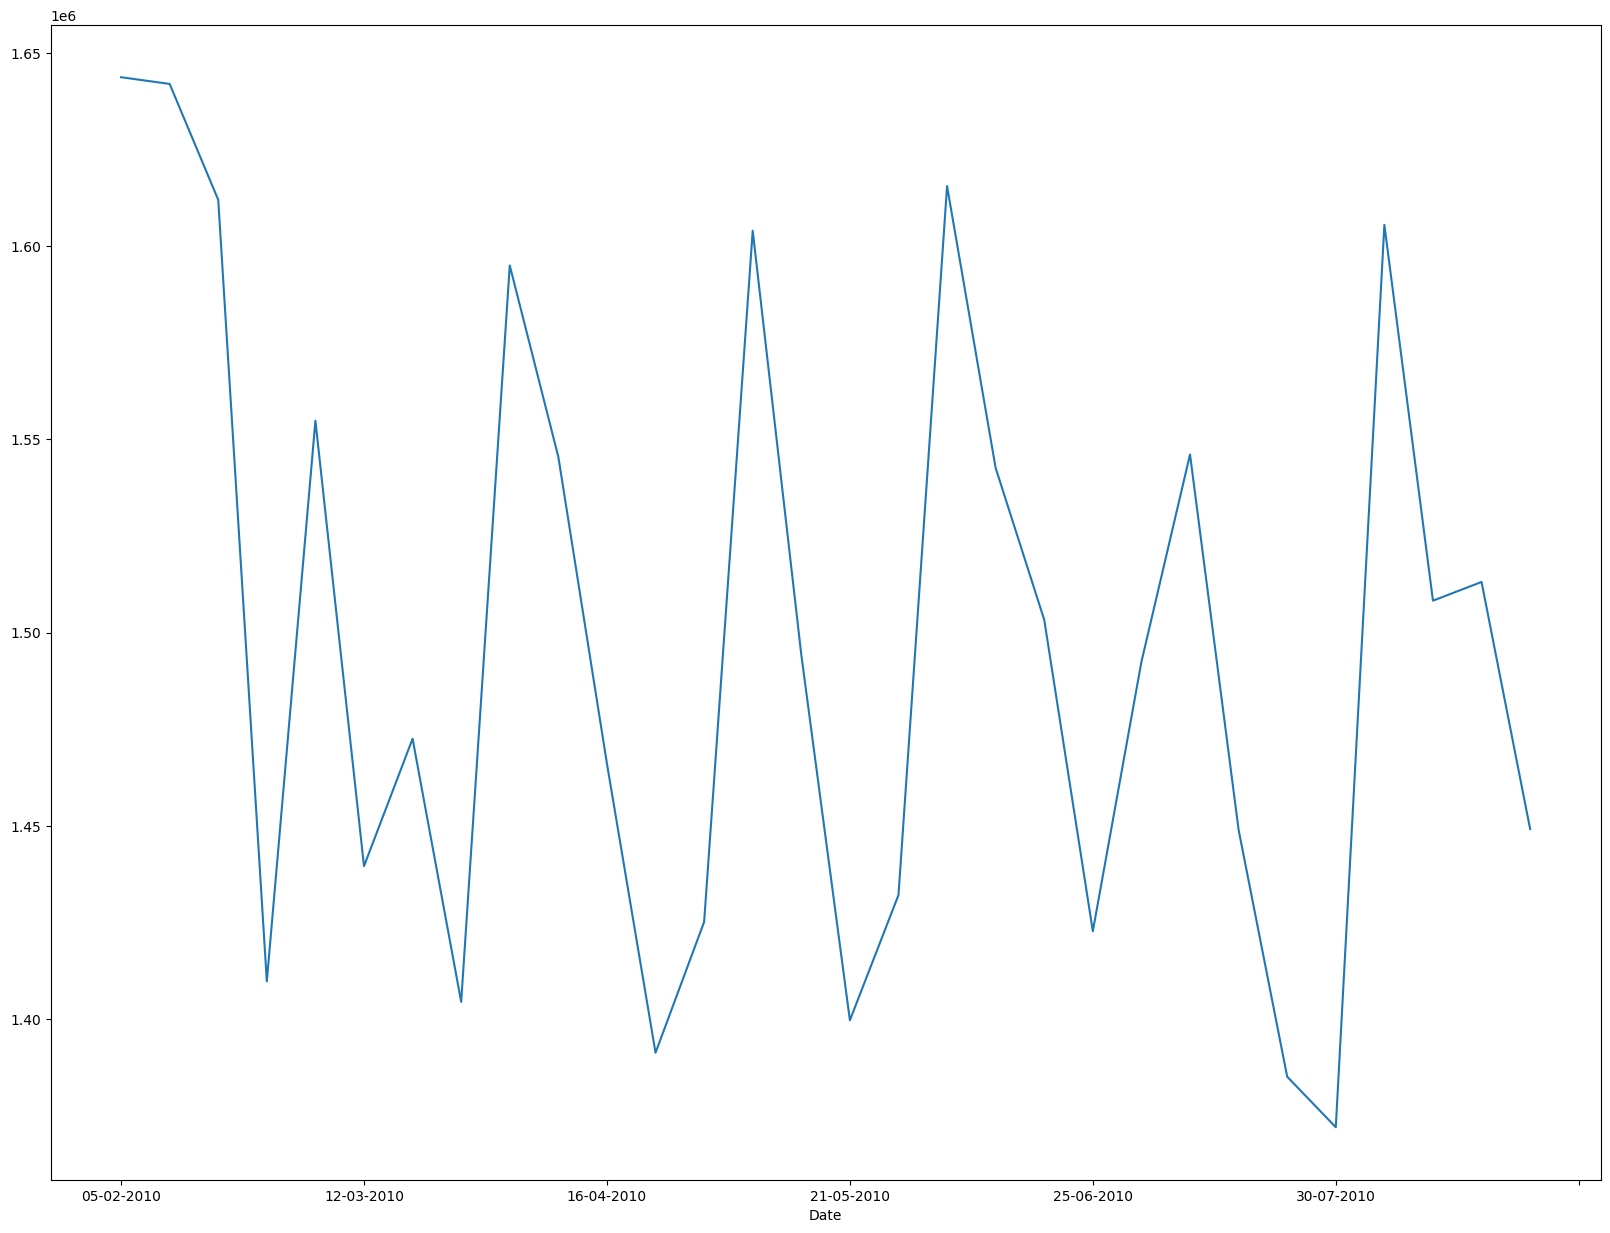

In [35]:
ax = walmart_data_store1['Weekly_Sales'].iloc[0:30].plot(figsize=(20, 15))

<Axes: xlabel='Date'>

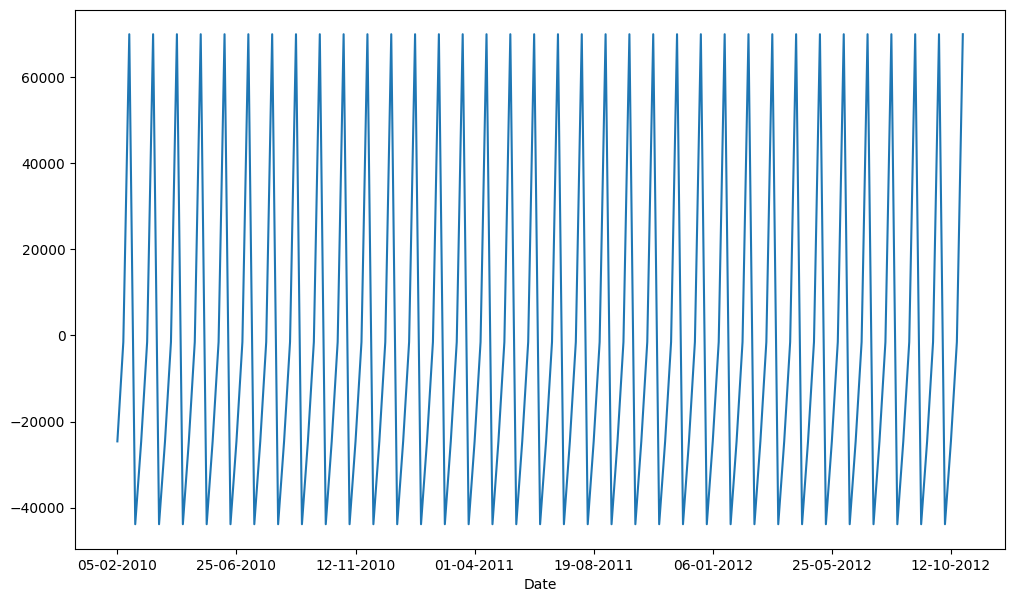

In [57]:
seasonal_decompose(walmart_data_store1['Weekly_Sales'], period=4).seasonal.plot(figsize=(12, 7))

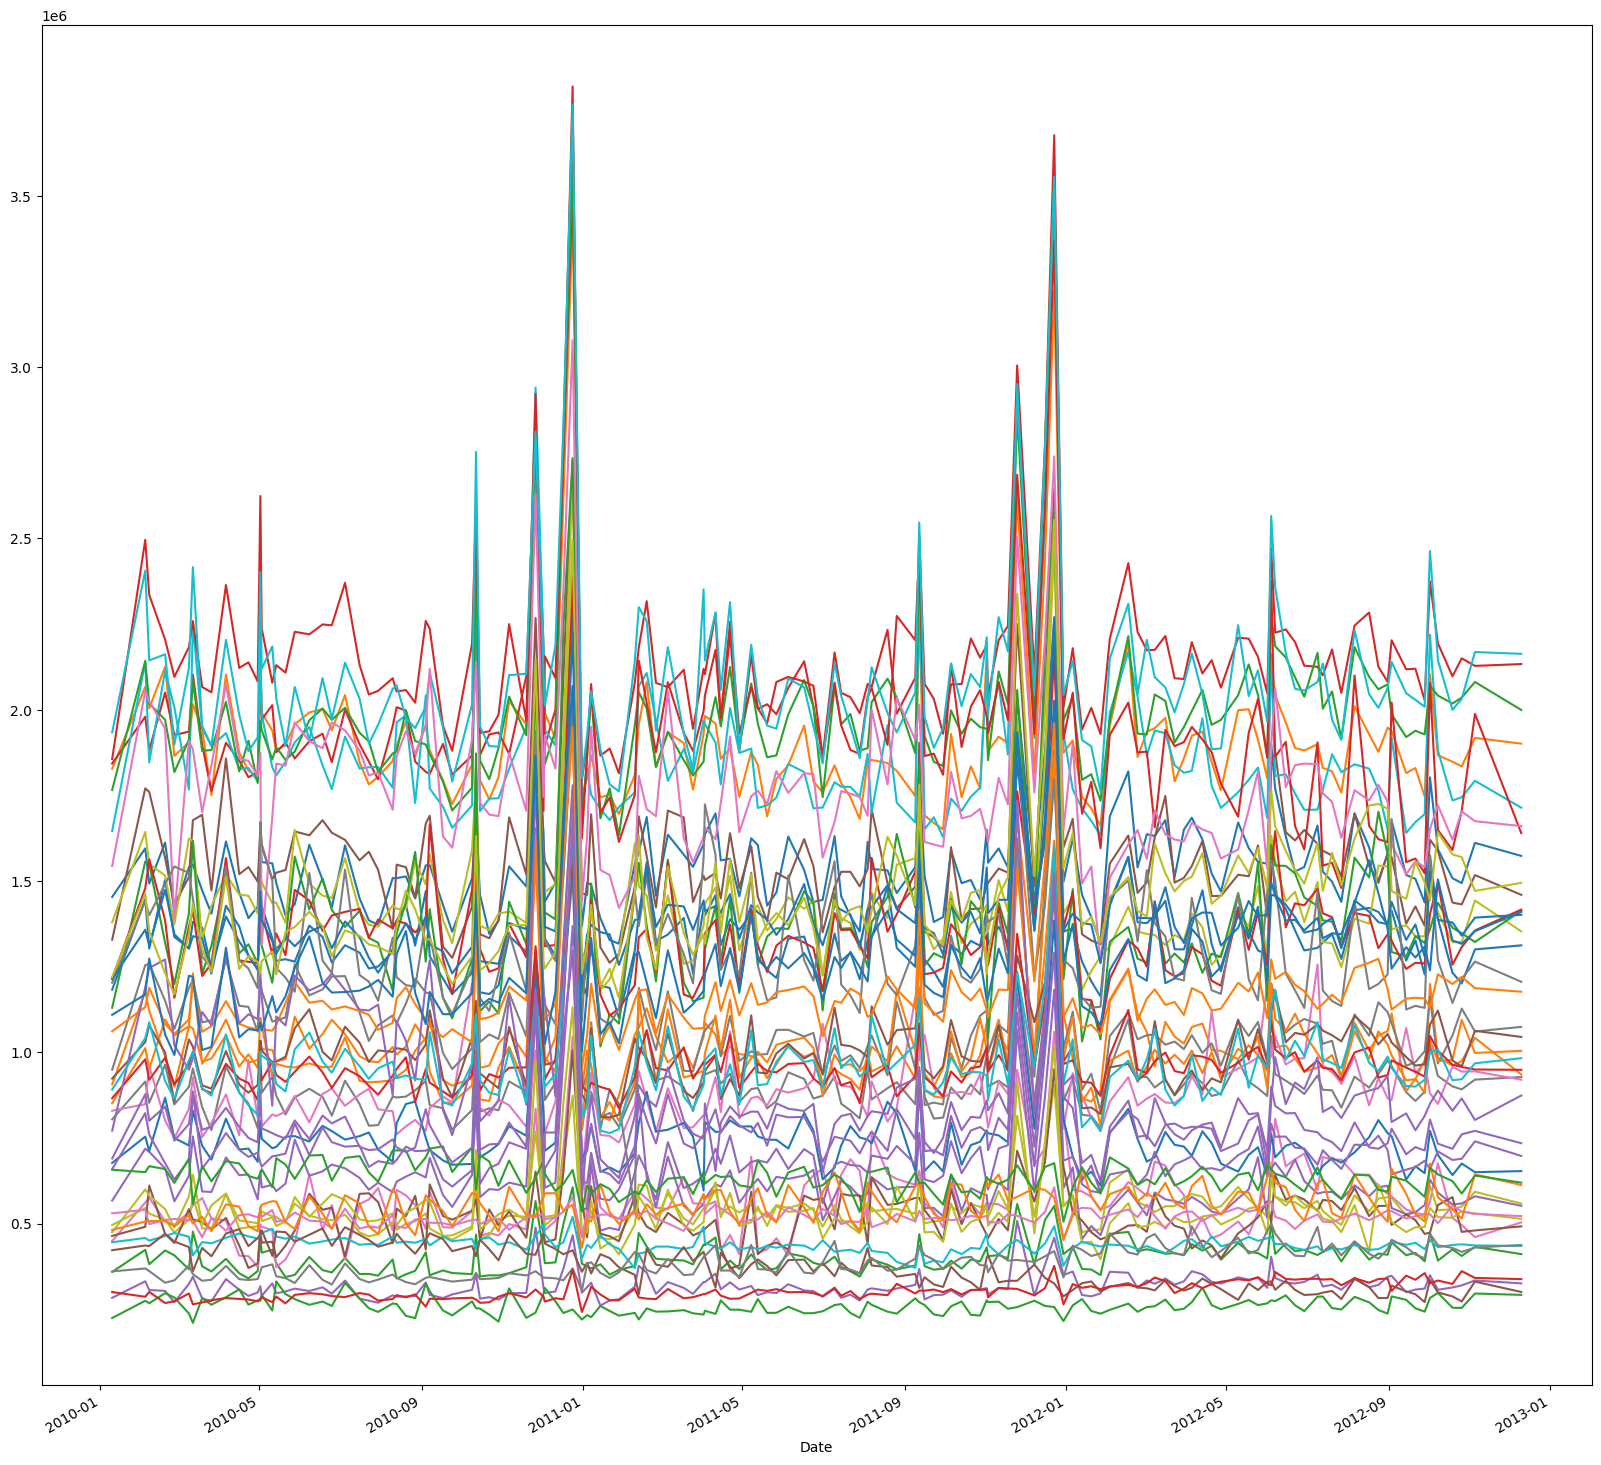

In [52]:
for i in range (1, 46):
    walmart[walmart['Store']==i]['Weekly_Sales'].plot(figsize=(20, 20))

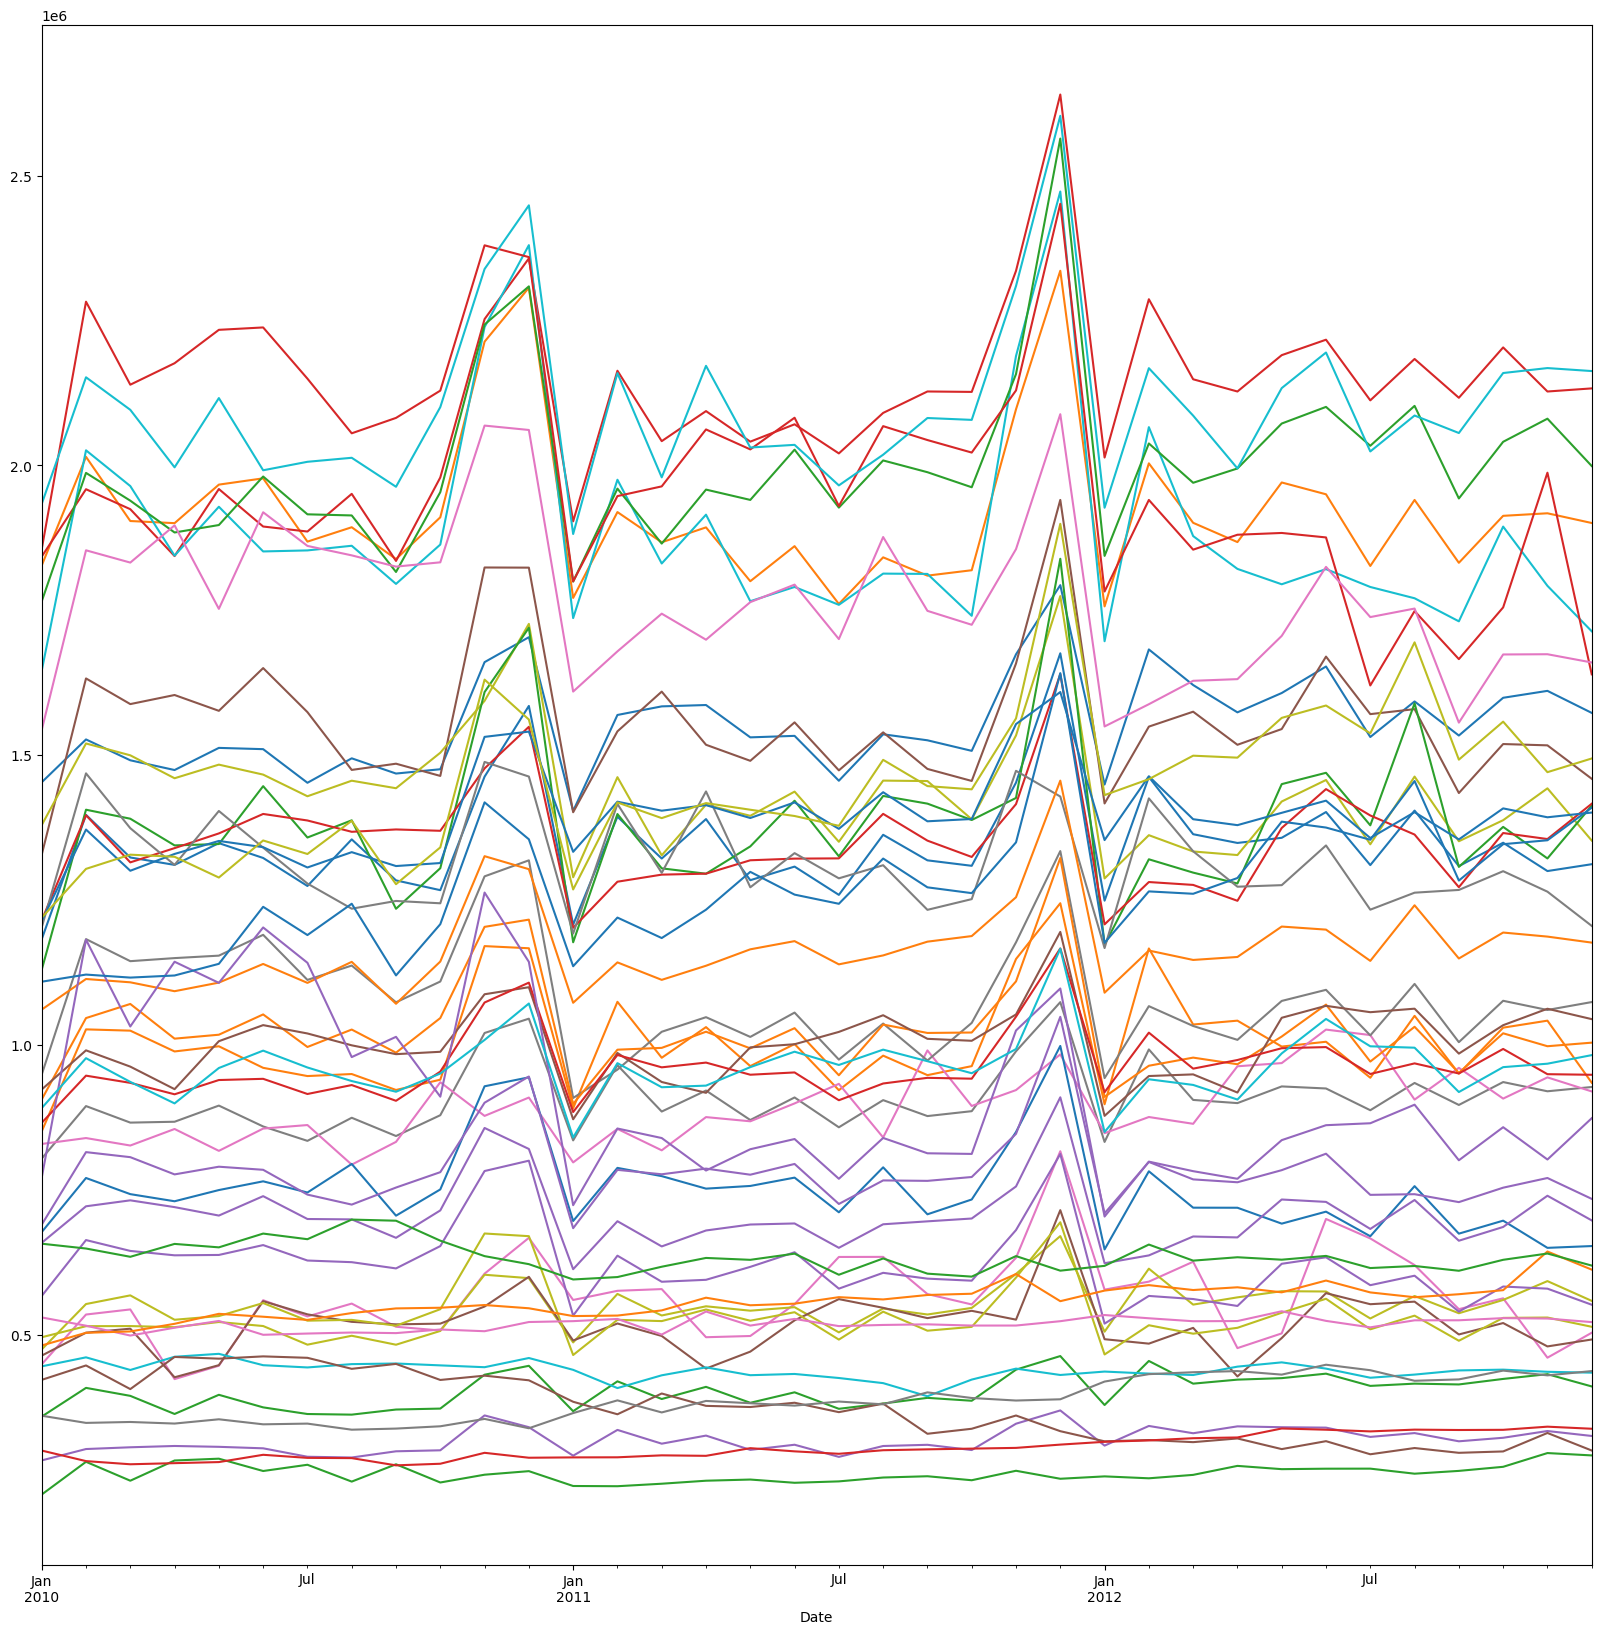

In [54]:
for i in range (1, 46):
    walmart[walmart['Store']==i]['Weekly_Sales'].resample('M').mean().dropna().plot(figsize=(20, 20))

In [55]:
peaks = {}
for i in range(1, 46):
    peaks['store'+str(i)] = walmart[walmart['Store']==i]['Weekly_Sales'].idxmax()

In [56]:
peaks

{'store1': Timestamp('2010-12-24 00:00:00'),
 'store2': Timestamp('2010-12-24 00:00:00'),
 'store3': Timestamp('2010-12-24 00:00:00'),
 'store4': Timestamp('2011-12-23 00:00:00'),
 'store5': Timestamp('2011-11-25 00:00:00'),
 'store6': Timestamp('2010-12-24 00:00:00'),
 'store7': Timestamp('2011-12-23 00:00:00'),
 'store8': Timestamp('2010-12-24 00:00:00'),
 'store9': Timestamp('2011-12-23 00:00:00'),
 'store10': Timestamp('2010-12-24 00:00:00'),
 'store11': Timestamp('2010-12-24 00:00:00'),
 'store12': Timestamp('2010-12-24 00:00:00'),
 'store13': Timestamp('2010-12-24 00:00:00'),
 'store14': Timestamp('2010-12-24 00:00:00'),
 'store15': Timestamp('2010-12-24 00:00:00'),
 'store16': Timestamp('2010-12-24 00:00:00'),
 'store17': Timestamp('2010-12-24 00:00:00'),
 'store18': Timestamp('2010-12-24 00:00:00'),
 'store19': Timestamp('2010-12-24 00:00:00'),
 'store20': Timestamp('2010-12-24 00:00:00'),
 'store21': Timestamp('2010-12-24 00:00:00'),
 'store22': Timestamp('2010-12-24 00:00:00'

Observation: Walmart got peak business days mostly on Christmas eve/couple of days before Christmas and black fridays